In [11]:
import pandas as pd
import talib
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the CSV file
df = pd.read_csv(r'C:\Users\medha\OneDrive\Desktop\Week1_Talib\data\TSLA_historical_data.csv')
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


In [4]:
# Remove rows with NaN values from all columns
df_cleaned = df.dropna()

# Save the cleaned data to a new CSV file
df_cleaned.to_csv(r'C:\Users\medha\OneDrive\Desktop\Week1_Talib\data\TSLA_historical_data_cleaned.csv', index=False)

# Load the cleaned data
df = pd.read_csv(r'C:\Users\medha\OneDrive\Desktop\Week1_Talib\data\TSLA_historical_data_cleaned.csv')

# Calculate a TA-Lib indicator Simple Moving Average
df['SMA'] = talib.SMA(df['Close'], timeperiod=200)  # 200 days

# Calculate a TA-Lib indicator Relative Strength Index
df['RSI'] = talib.RSI(df['Close'], timeperiod=200)  # 200 days

# Calculate MACD
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], 
                                                               fastperiod=12, 
                                                               slowperiod=26, 
                                                               signalperiod=9)

# Remove rows with NaN values after calculations
df = df.dropna()

# Display the last few rows of the DataFrame
print(df[['Close', 'SMA', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']])

           Close         SMA        RSI       MACD  MACD_Signal  MACD_Hist
200     1.971333    1.846590  51.752795  -0.005376    -0.035629   0.030252
201     1.938000    1.847900  51.557057   0.000697    -0.028364   0.029060
202     1.972000    1.849233  51.744156   0.008159    -0.021059   0.029218
203     2.016667    1.850973  51.988987   0.017476    -0.013352   0.030828
204     2.076667    1.852970  52.315601   0.029362    -0.004809   0.034172
...          ...         ...        ...        ...          ...        ...
3340  215.990005  205.241000  50.201595  11.789291    15.873789  -4.084498
3341  220.250000  205.039600  50.394554   9.353206    14.569672  -5.216466
3342  219.800003  204.840250  50.373832   7.302106    13.116159  -5.814053
3343  232.100006  204.682650  50.928144   6.593101    11.811547  -5.218447
3344  222.619995  204.480800  50.491286   5.206237    10.490485  -5.284248

[3145 rows x 6 columns]


In [6]:
# Display the first few rows of the DataFrame
print("Historical Data:")
print(df.head())

Historical Data:
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500   
1  2010-06-30  1.719333  2.028000  1.553333  1.588667   1.588667  257806500   
2  2010-07-01  1.666667  1.728000  1.351333  1.464000   1.464000  123282000   
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   1.280000   77097000   
4  2010-07-06  1.333333  1.333333  1.055333  1.074000   1.074000  103003500   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [7]:
# Create a Ticker object for TSLA
ticker = yf.Ticker("TSLA")

In [8]:
# Get financial statements
financials = ticker.financials
print("\nFinancials:")
print(financials)


Financials:
                                                       2023-12-31  \
Tax Effect Of Unusual Items                                   0.0   
Tax Rate For Calcs                                           0.21   
Normalized EBITDA                                   14796000000.0   
Total Unusual Items                                           0.0   
Total Unusual Items Excluding Goodwill                        0.0   
Net Income From Continuing Operation Net Minori...  14999000000.0   
Reconciled Depreciation                              4667000000.0   
Reconciled Cost Of Revenue                          79113000000.0   
EBITDA                                              14796000000.0   
EBIT                                                10129000000.0   
Net Interest Income                                   910000000.0   
Interest Expense                                      156000000.0   
Interest Income                                      1066000000.0   
Normalized Income    

In [9]:
# Get the balance sheet
balance_sheet = ticker.balance_sheet
print("\nBalance Sheet:")
print(balance_sheet)


Balance Sheet:
                                                     2023-12-31  \
Treasury Shares Number                                      0.0   
Ordinary Shares Number                             3185000000.0   
Share Issued                                       3185000000.0   
Net Debt                                                    NaN   
Total Debt                                         9573000000.0   
...                                                         ...   
Cash Cash Equivalents And Short Term Investments  29094000000.0   
Other Short Term Investments                      12696000000.0   
Cash And Cash Equivalents                         16398000000.0   
Cash Equivalents                                    495000000.0   
Cash Financial                                    15903000000.0   

                                                     2022-12-31  \
Treasury Shares Number                                      NaN   
Ordinary Shares Number                       

In [10]:
# Get the cash flow statement
cash_flow = ticker.cashflow
print("\nCash Flow Statement:")
print(cash_flow)


Cash Flow Statement:
                                                   2023-12-31     2022-12-31  \
Free Cash Flow                                   4357000000.0   7552000000.0   
Repayment Of Debt                               -1815000000.0  -3866000000.0   
Issuance Of Debt                                 3931000000.0            0.0   
Issuance Of Capital Stock                                 NaN            0.0   
Capital Expenditure                             -8899000000.0  -7172000000.0   
Interest Paid Supplemental Data                   126000000.0    152000000.0   
Income Tax Paid Supplemental Data                1119000000.0   1203000000.0   
End Cash Position                               17189000000.0  16924000000.0   
Beginning Cash Position                         16924000000.0  18144000000.0   
Effect Of Exchange Rate Changes                     4000000.0   -444000000.0   
Changes In Cash                                   261000000.0   -776000000.0   
Financing Cash Flo

In [13]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' as the index
df.set_index('Date', inplace=True)

In [16]:
# Calculate Moving Averages
df['MA20'] = df['Close'].rolling(window=20).mean()  # 20-day moving average
df['MA50'] = df['Close'].rolling(window=50).mean()  # 50-day moving average

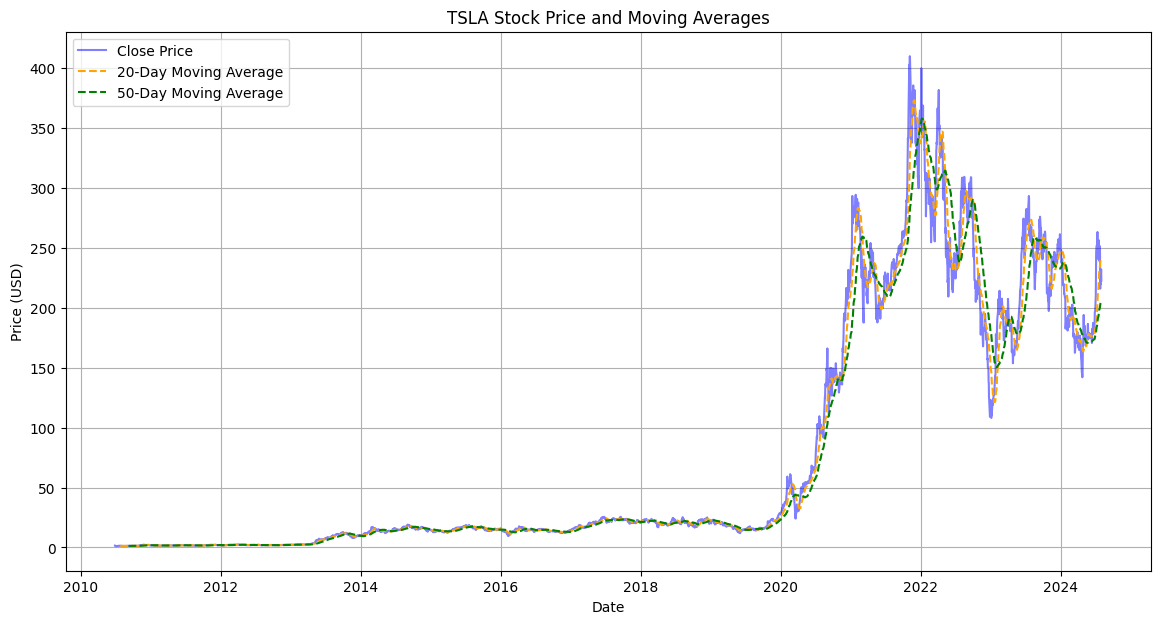

In [19]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(df['MA20'], label='20-Day Moving Average', color='orange', linestyle='--')
plt.plot(df['MA50'], label='50-Day Moving Average', color='green', linestyle='--')

plt.title('TSLA Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()